In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [25]:
ddf = dd.read_csv('craigslist_vehicles.csv')

In [26]:
df = ddf.compute()
df = df.sample(50000)

In [4]:
print(df.shape)
df.head(2)

(50000, 28)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
11769,136657,7315751125,https://spokane.craigslist.org/ctd/d/spokane-2...,spokane / coeur d'alene,https://spokane.craigslist.org,0,2006.0,kia,sedona,NaN,NaN,gas,154946.0,clean,automatic,KNDMB233666021437,fwd,NaN,mini-van,blue,https://images.craigslist.org/00W0W_askvCPTaHr...,2006 Kia Sedona VQ Offered by: Valley Auto...,NaN,id,47.656773,-117.218613,2021-05-02 00:00:00+00:00,2021-05-30 00:00:00+00:00
8489,66680,7316527839,https://ventura.craigslist.org/ctd/d/north-hol...,ventura county,https://ventura.craigslist.org,0,2014.0,bmw,x1 sdrive28i,NaN,NaN,gas,67932.0,clean,automatic,WBAVM1C57EVW56114,rwd,full-size,other,black,https://images.craigslist.org/00q0q_hMZBgcfaR2...,2014 BMW X1 sDrive28i **$0-$500 DOWN. *BAD CRE...,NaN,ca,34.186430,-118.404820,2021-05-04 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 11769 to 7568
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50000 non-null  int64  
 1   id            50000 non-null  int64  
 2   url           50000 non-null  object 
 3   region        50000 non-null  object 
 4   region_url    50000 non-null  object 
 5   price         50000 non-null  int64  
 6   year          49865 non-null  float64
 7   manufacturer  47987 non-null  object 
 8   model         49384 non-null  object 
 9   condition     29501 non-null  object 
 10  cylinders     29167 non-null  object 
 11  fuel          49662 non-null  object 
 12  odometer      49481 non-null  float64
 13  title_status  49032 non-null  object 
 14  transmission  49723 non-null  object 
 15  VIN           31155 non-null  object 
 16  drive         34833 non-null  object 
 17  size          14239 non-null  object 
 18  type          39200 non-null

In [27]:
# convert datatypes
for col in df.columns:
    if col.endswith('date'):
        df[col] = pd.to_datetime(df[col])
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')

In [28]:
# missing values treatment with median and mode
for col in df.columns:
    if df[col].dtype in ['float', 'int']:
        df[col] = df[col].fillna(df[col].median())
    if df[col].dtype == 'category':
        df[col] = df[col].fillna(df[col].mode().iloc[0])

/home/elijah/Disk/Projects/lux_dsea_projects/craiglist_listings/env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [29]:
df.drop(['county', 'Unnamed: 0'], axis=1, inplace=True)

In [30]:
df.tail(1)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date,removal_date
3698,7316547047,https://portland.craigslist.org/clk/ctd/d/port...,portland,https://portland.craigslist.org,23491,2020.0,ford,ecosport,excellent,4 cylinders,gas,1233.0,clean,automatic,MAJ6S3KL7LC349193,4wd,full-size,SUV,white,https://images.craigslist.org/00707_1hDPIGooaP...,2020 *** Ford EcoSport Titanium 4WD SUV *** ...,or,45.50435,-122.532962,2021-05-04 00:00:00+00:00,2021-05-20 00:00:00+00:00


/tmp/ipykernel_2306/3542271227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  posting_gouped = df.groupby(['posting_date', 'state'])['price'].mean().reset_index()


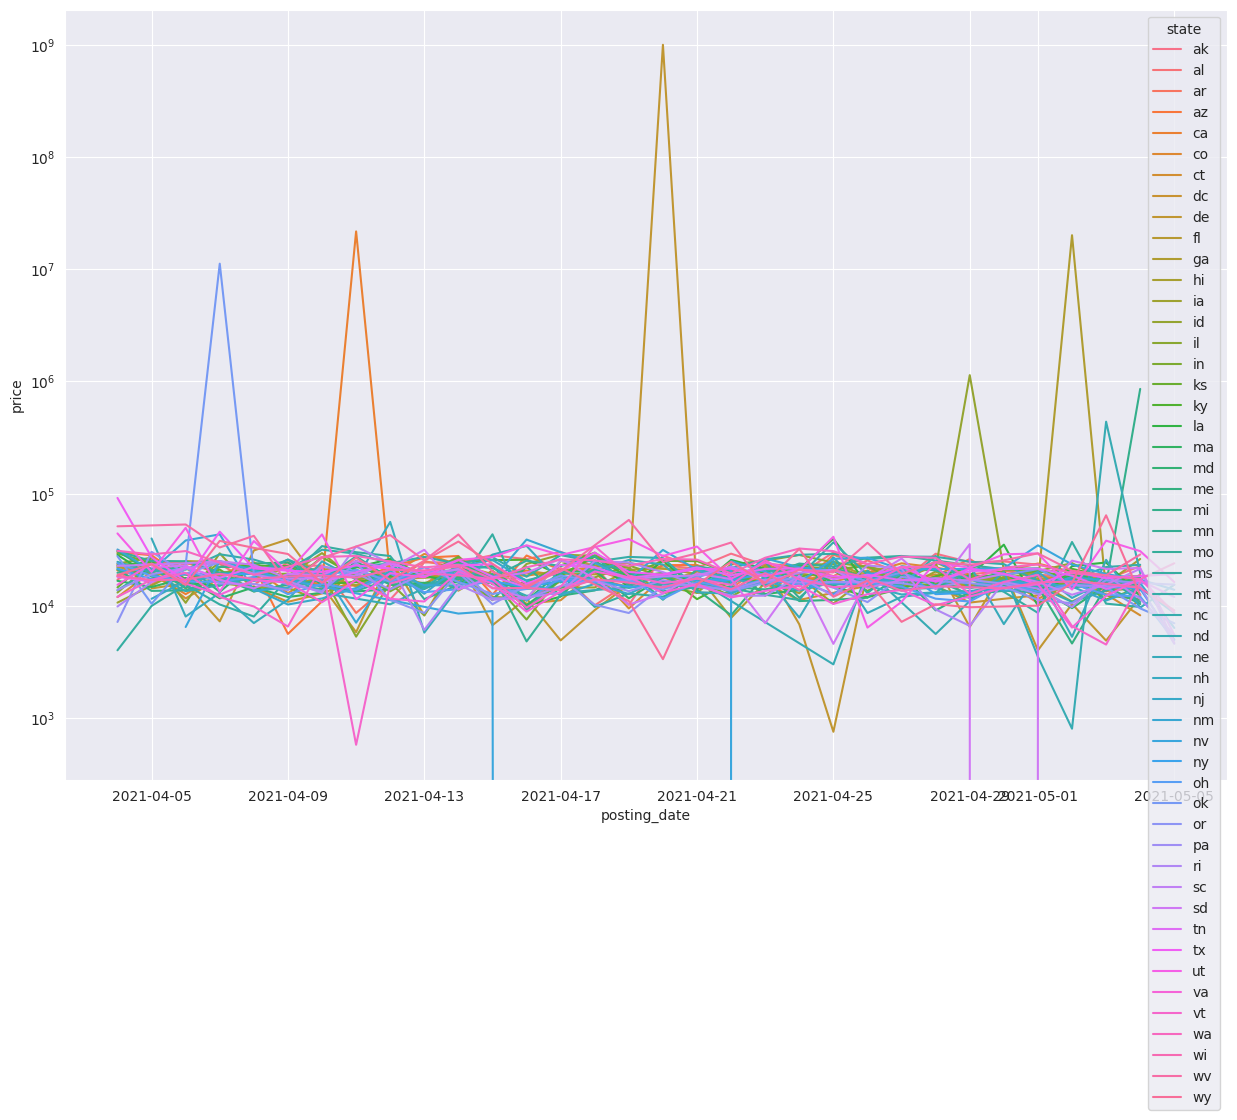

In [41]:
posting_gouped = df.groupby(['posting_date', 'state'])['price'].mean().reset_index()
posting_gouped.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data= posting_gouped, x='posting_date', y='price', hue='state')
plt.yscale('log')